In [ ]:
# Dropping the 'CustomerIDl column
rfm_df.drop(columns = 'CustomerID', inplace = True)
rfm_df

,Monetary,Frequency,Recency
0,77183.60,1,326
1,4310.00,182,2
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
...,...,...,...
4334,180.60,10,278
4335,80.82,7,181
4336,178.05,12,8
4337,2094.88,756,4


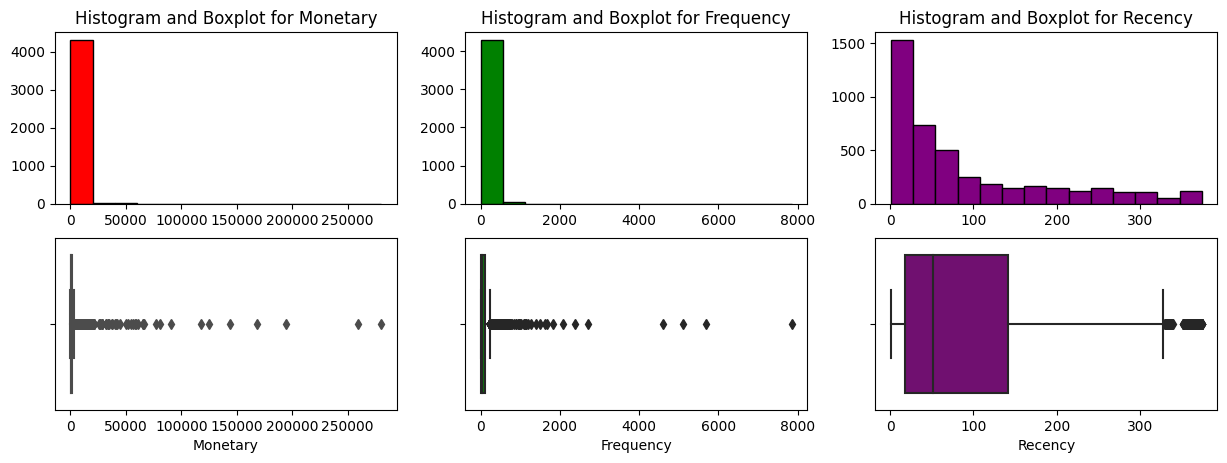

In [ ]:
# Obtain the histogram and boxplots
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 5), dpi = 100)

# Construct Histogram and Boxplot for 'Monetary'
axis[0, 0].hist(rfm_df['Monetary'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
sns.boxplot(x = 'Monetary', data = rfm_df, ax = axis[1, 0], color = 'red')
axis[0, 0].set_title("Histogram and Boxplot for Monetary")

# Construct Histogram and Boxplot for 'Frequency'
axis[0, 1].hist(rfm_df['Frequency'], bins = 'sturges', facecolor = 'green', edgecolor = 'black')
sns.boxplot(x = 'Frequency', data = rfm_df, ax = axis[1, 1], color = 'green')
axis[0, 1].set_title("Histogram and Boxplot for Frequency")

# Construct Histogram and Boxplot for 'Recency'
axis[0, 2].hist(rfm_df['Recency'], bins = 'sturges', facecolor = 'purple', edgecolor = 'black')
sns.boxplot(x = 'Recency', data = rfm_df, ax = axis[1, 2], color = 'purple')
axis[0, 2].set_title("Histogram and Boxplot for Recency")

plt.show()

In [ ]:
#  Create a function for removing the outliers.
def remove_outliers(df, col):
  q1 = df[col].quantile(0.25)  # Q1
  q3 = df[col].quantile(0.75)  # Q3
  iqr = q3 - q1                # IQR = Q3 - Q1
  lower_bound =  q1 - 1.5 * iqr  # lower_bound = Q1 − 1.5 * IQR
  upper_bound = q3 + 1.5 * iqr  # upper_bound = Q3 + 1.5 * IQR
  new_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

  return new_df

In [ ]:
#Removing outliers from 'Monetary' field
m_clean_df = remove_outliers(rfm_df, 'Monetary')
m_clean_df = m_clean_df.reset_index(drop = True)
m_clean_df

,Monetary,Frequency,Recency
0,1797.24,31,75
1,1757.55,73,19
2,334.40,17,310
3,2506.04,85,36
4,89.00,4,204
...,...,...,...
3907,180.60,10,278
3908,80.82,7,181
3909,178.05,12,8
3910,2094.88,756,4


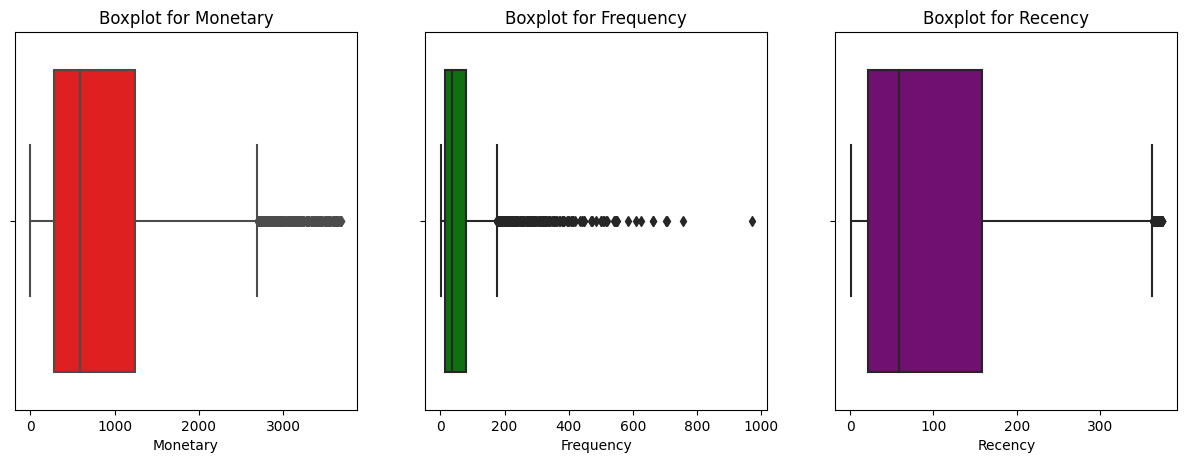

In [ ]:
#  Obtain the boxplots
fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5), dpi = 100)

# Construct Boxplot for 'Monetary'
sns.boxplot(x = 'Monetary', data = m_clean_df, ax = axis[0], color = 'red')
axis[0].set_title("Boxplot for Monetary")

# Construct Boxplot for 'Frequency'
sns.boxplot(x = 'Frequency', data = m_clean_df, ax = axis[1], color = 'green')
axis[1].set_title("Boxplot for Frequency")

# Construct Boxplot for 'Recency'
sns.boxplot(x = 'Recency', data = m_clean_df, ax = axis[2], color = 'purple')
axis[2].set_title("Boxplot for Recency")

plt.show()

In [ ]:
#  Normalise the RFM parameters
# Import StandardScaler Module from sklearn
from sklearn.preprocessing import StandardScaler

# Make an object 'StandardScaler()'
standard_scaler = StandardScaler()

# Perform fit and transform operation using 'fit_transform()'
scaled_values = standard_scaler.fit_transform(m_clean_df)

# Make a new DataFrame
scaled_df = pd.DataFrame(scaled_values)
scaled_df.columns = m_clean_df.columns
scaled_df

,Monetary,Frequency,Recency
0,1.099421,-0.394646,-0.244806
1,1.051512,0.148701,-0.796176
2,-0.666340,-0.575761,2.068980
3,1.954997,0.303943,-0.628796
4,-0.962557,-0.743940,1.025315
...,...,...,...
3907,-0.851989,-0.666319,1.753911
3908,-0.972431,-0.705130,0.798859
3909,-0.855067,-0.640446,-0.904481
3910,1.458695,8.984552,-0.943865


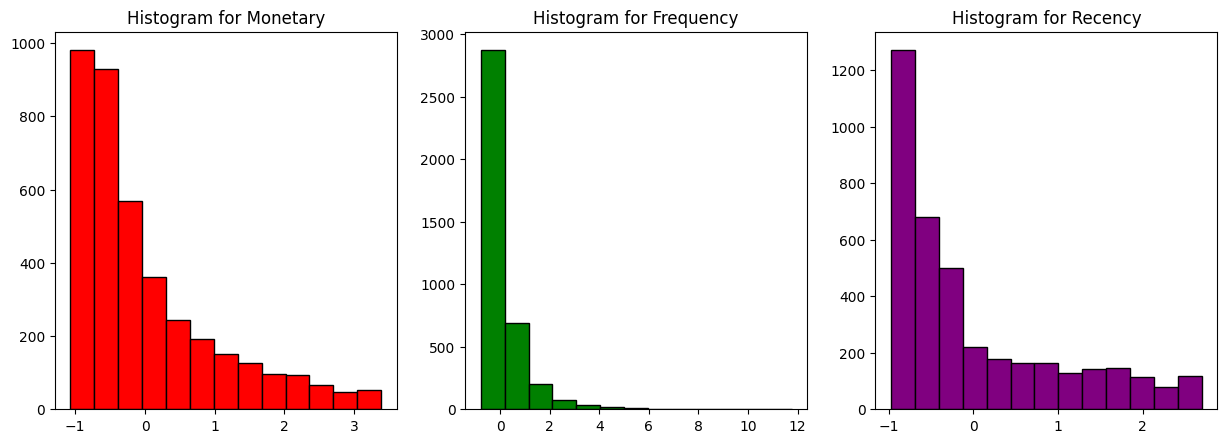

In [ ]:
#  Obtain the histograms.
fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5), dpi = 100)

# Construct Histogram for 'Monetary'
axis[0].hist(scaled_df['Monetary'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
axis[0].set_title("Histogram for Monetary")

# Construct Histogram for 'Frequency'
axis[1].hist(scaled_df['Frequency'], bins = 'sturges', facecolor = 'green', edgecolor = 'black')
axis[1].set_title("Histogram for Frequency")

# Construct Histogram for 'Recency'
axis[2].hist(scaled_df['Recency'], bins = 'sturges', facecolor = 'purple', edgecolor = 'black')
axis[2].set_title("Histogram for Recency")

plt.show()

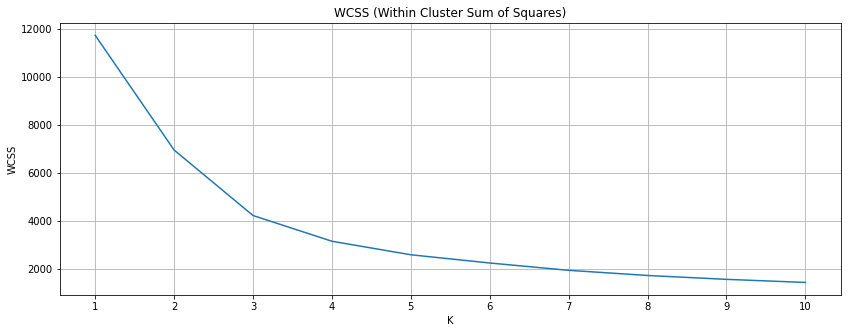

In [ ]:
#  Determine 'K' using Elbow method.
from sklearn.cluster import KMeans
wcss = []

clusters = range(1, 11)
# Initiate a for loop that ranges from 1 to 10.
for k in clusters:
    # Inside for loop, perform K-means clustering for current value of K. Use 'fit()' to train the model.
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(scaled_df)
    # Find wcss for current K value using 'inertia_' attribute and append it to the empty list.
    wcss.append(kmeans.inertia_)

# Plot WCSS vs number of clusters.
plt.figure(figsize = (14, 5))
plt.title('WCSS (Within Cluster Sum of Squares)')
plt.plot(clusters, wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid()
plt.xticks(range(1,11))
plt.show()

In [ ]:
#  Clustering the dataset for K = 4
from sklearn.cluster import KMeans

# Perform K-Means clustering with n_clusters = 4 and random_state = 10
kmeans_model = KMeans(n_clusters = 4, random_state = 10)

# Fit the model to the scaled_df
kmeans_model.fit(scaled_df)

# Make a series using predictions by K-Means
cluster_labels = pd.Series(kmeans_model.predict(scaled_df))
cluster_labels.value_counts()

3    2024
0     983
2     786
1     119
dtype: int64

In [ ]:
# Create a DataFrame with cluster labels for cluster visualisation
km_df = pd.concat([m_clean_df, cluster_labels], axis = 1)
km_df.columns = list(m_clean_df.columns) + ['Cluster Label']
km_df

,Monetary,Frequency,Recency,Cluster Label
0,1797.24,31,75,2
1,1757.55,73,19,2
2,334.40,17,310,0
3,2506.04,85,36,2
4,89.00,4,204,0
...,...,...,...,...
3907,180.60,10,278,0
3908,80.82,7,181,0
3909,178.05,12,8,3
3910,2094.88,756,4,1


In [ ]:
#  Visualising the clusters for customer segmentation
import plotly.express as px
plotly_fig = px.scatter_3d(km_df, x = 'Monetary', y = 'Frequency', z = 'Recency', color = 'Cluster Label')
plotly_fig.show()

In [ ]:
#  Understanding the Cluster Distribution
mean_df = km_df.groupby(['Cluster Label']).agg({'Recency':['mean'],
                                              'Frequency':['mean'],
                                              'Monetary':['mean','count']}).round(0)
mean_df

Recency Frequency Monetary      
                 mean      mean     mean count
Cluster Label                                 
0               255.0      24.0    380.0   983
1                24.0     374.0   2405.0   119
2                42.0     119.0   2096.0   786
3                52.0      39.0    573.0  2024